In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data = df.iloc[:,[3,4]].values
inertias = []
fits = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters = k, init = 'k-means++', n_init = 'auto', random_state = 1)
    kmeanModel.fit(data)
    inertias.append(kmeanModel.inertia_)
    fits.append(kmeanModel)

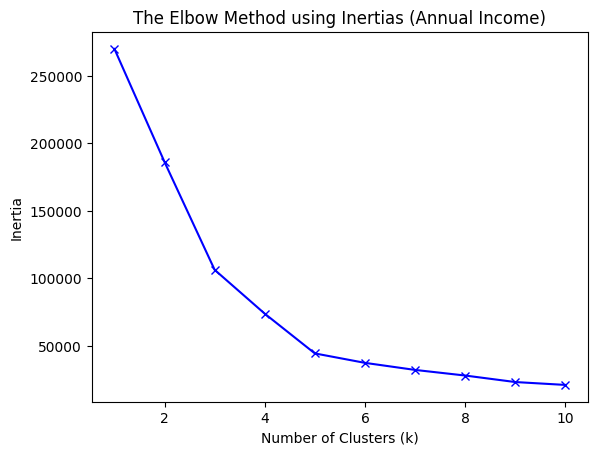

In [4]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertias (Annual Income)')
plt.show()

Elbow at k = 5

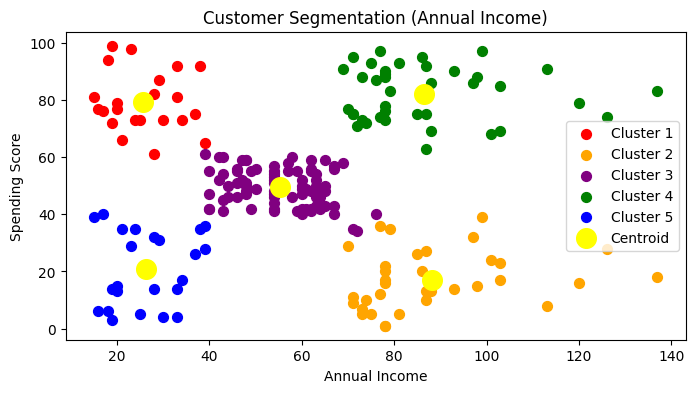

In [5]:
y_kmeans = fits[4].fit_predict(data)
fig,ax = plt.subplots(figsize=(8,4))
ax.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=50,c='red',label='Cluster 1')
ax.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=50,c='orange',label='Cluster 2')
ax.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=50,c='purple',label='Cluster 3')
ax.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=50,c='green',label='Cluster 4')
ax.scatter(data[y_kmeans==4,0],data[y_kmeans==4,1],s=50,c='blue',label='Cluster 5')
ax.scatter(fits[4].cluster_centers_[:,0],fits[4].cluster_centers_[:,1],s=200,c='yellow',label='Centroid')
plt.title('Customer Segmentation (Annual Income)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

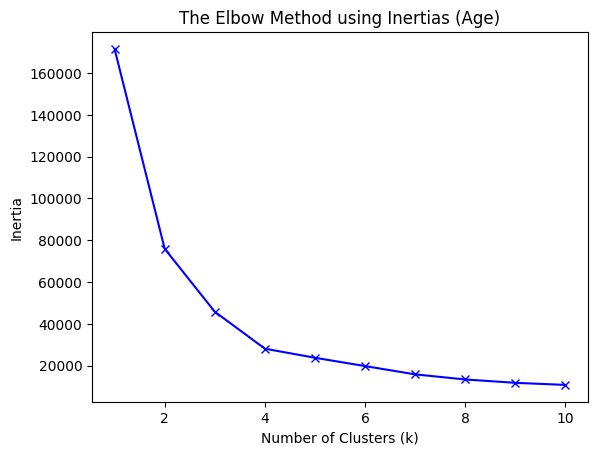

In [6]:
data2 = df.iloc[:,[2,4]].values
inertias2 = []
fits2 = []
K2 = range(1,11)
for k2 in K2:
    kmeanModel2 = KMeans(n_clusters = k2, init = 'k-means++', n_init = 'auto', random_state = 1)
    kmeanModel2.fit(data2)
    inertias2.append(kmeanModel2.inertia_)
    fits2.append(kmeanModel2)
plt.plot(K2, inertias2, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertias (Age)')
plt.show()

Elbow at k = 4

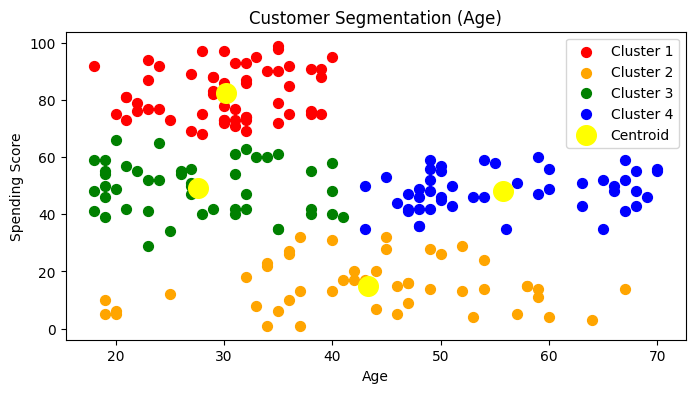

In [7]:
y_kmeans2 = fits2[3].fit_predict(data2)
fig2,ax2 = plt.subplots(figsize=(8,4))
ax2.scatter(data2[y_kmeans2==0,0],data2[y_kmeans2==0,1],s=50,c='red',label='Cluster 1')
ax2.scatter(data2[y_kmeans2==1,0],data2[y_kmeans2==1,1],s=50,c='orange',label='Cluster 2')
ax2.scatter(data2[y_kmeans2==2,0],data2[y_kmeans2==2,1],s=50,c='green',label='Cluster 3')
ax2.scatter(data2[y_kmeans2==3,0],data2[y_kmeans2==3,1],s=50,c='blue',label='Cluster 4')
ax2.scatter(fits2[3].cluster_centers_[:,0],fits2[3].cluster_centers_[:,1],s=200,c='yellow',label='Centroid')
plt.title('Customer Segmentation (Age)')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()